In [2]:
import os
import glob
import pandas as pd
import time
import os
import gc
import itertools
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import mutual_info_score, precision_score, recall_score, fbeta_score, confusion_matrix, accuracy_score
#import lightgbm as lgb
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#import missingno as msno
from keras.utils import to_categorical
from sklearn.metrics import mutual_info_score
from sklearn.metrics import mutual_info_score, precision_score, recall_score, fbeta_score, confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn.utils import resample
import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.metrics import classification_report
import random
import lightgbm as lgb


%matplotlib inline


Using TensorFlow backend.


In [4]:
data=pd.read_csv("F:/film/11-14/Downloads/airline project/normalized_data/combined_csv.csv")

In [4]:
print(data.shape)
data.head()

(18008372, 15)


Year  Month  DayofMonth  DayOfWeek  FlightNum  DepDel15  ArrDel15  \
0  2013      1    0.566667   0.666667   0.166426       0.0       0.0   
1  2013      1    0.566667   0.666667   0.166537       0.0       0.0   
2  2013      1    0.566667   0.666667   0.166648       0.0       1.0   
3  2013      1    0.566667   0.666667   0.166759       0.0       1.0   
4  2013      1    0.566667   0.666667   0.166871       0.0       0.0   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  \
0           0.0      0.000000  0.000000            0.0                0.0   
1           0.0      0.000000  0.000000            0.0                0.0   
2           0.0      0.000000  0.023599            0.0                0.0   
3           0.0      0.008171  0.029499            0.0                0.0   
4           0.0      0.000000  0.000000            0.0                0.0   

   FlightDate Origin Dest  
0    0.566667    PHL  MSP  
1    0.566667    FLL  LGA  
2    0.566667    LGA  ATL  
3    0.566667    SLC  ATL  
4    0.566667    BOS  ATL

In [5]:
data.dtypes

Year                   int64
Month                  int64
DayofMonth           float64
DayOfWeek            float64
FlightNum            float64
DepDel15             float64
ArrDel15             float64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
FlightDate           float64
Origin                object
Dest                  object
dtype: object

In [8]:
data.loc[data['DepDel15'] ==1.0 , 'Delay'] = 1 
data.loc[data['ArrDel15'] ==1.0, 'Delay'] = 1 
data.loc[data['ArrDel15'] ==0.0, 'Delay'] = 0
data.drop(['ArrDel15','DepDel15','Origin','Dest'],axis=1,inplace=True)

In [11]:
data.head()

Year  Month  DayofMonth  DayOfWeek  FlightNum  CarrierDelay  WeatherDelay  \
0  2013      1    0.566667   0.666667   0.166426           0.0      0.000000   
1  2013      1    0.566667   0.666667   0.166537           0.0      0.000000   
2  2013      1    0.566667   0.666667   0.166648           0.0      0.000000   
3  2013      1    0.566667   0.666667   0.166759           0.0      0.008171   
4  2013      1    0.566667   0.666667   0.166871           0.0      0.000000   

   NASDelay  SecurityDelay  LateAircraftDelay  FlightDate  Delay  
0  0.000000            0.0                0.0    0.566667    0.0  
1  0.000000            0.0                0.0    0.566667    0.0  
2  0.023599            0.0                0.0    0.566667    1.0  
3  0.029499            0.0                0.0    0.566667    1.0  
4  0.000000            0.0                0.0    0.566667    0.0

In [34]:
data.loc[data['Delay'] ==1.0 , 'Delay_min']= randomlist2
data.loc[data['Delay'] ==0.0 , 'Delay_min']= randomlist1

In [33]:
randomlist1 = []
for i in range(0,data[data['Delay']==0].shape[0]):
    n = random.randint(0,15)
    randomlist1.append(n)
#print(randomlist1)
randomlist2 = []
for j in range(0,data[data['Delay']==1].shape[0]):
    m = random.randint(15,75)
    randomlist2.append(m)
#print(randomlist1)

In [35]:
#########trafic in US####################

In [37]:
'''Import basic modules.'''
import pandas as pd
import numpy as np
from scipy import stats

'''Customize visualization
Seaborn and matplotlib visualization.'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [38]:
df_train = pd.read_csv('F:/booj/11-14/Downloads/airline project/waiting time/train.csv')
df_test = pd.read_csv('F:/booj/11-14/Downloads/airline project/waiting time/test.csv')

In [39]:
'''Train and Test data at a glance.'''
bold('**Preview of Train Data:**')
display(df_train.head())
bold('**Preview of Test Data:**')
display(df_test.head())

**Preview of Train Data:**

RowId  IntersectionId   Latitude  Longitude  \
0  1921357               0  33.791659 -84.430032   
1  1921358               0  33.791659 -84.430032   
2  1921359               0  33.791659 -84.430032   
3  1921360               0  33.791659 -84.430032   
4  1921361               0  33.791659 -84.430032   

                EntryStreetName                ExitStreetName EntryHeading  \
0  Marietta Boulevard Northwest  Marietta Boulevard Northwest           NW   
1  Marietta Boulevard Northwest  Marietta Boulevard Northwest           SE   
2  Marietta Boulevard Northwest  Marietta Boulevard Northwest           NW   
3  Marietta Boulevard Northwest  Marietta Boulevard Northwest           SE   
4  Marietta Boulevard Northwest  Marietta Boulevard Northwest           NW   

  ExitHeading  Hour  Weekend  ...  TimeFromFirstStop_p40  \
0          NW     0        0  ...                    0.0   
1          SE     0        0  ...                    0.0   
2          NW     1        0  ...                    0.0   
3          SE     1        0  ...                    0.0   
4          NW     2        0  ...                    0.0   

  TimeFromFirstStop_p50  TimeFromFirstStop_p60  TimeFromFirstStop_p80  \
0                   0.0                    0.0                    0.0   
1                   0.0                    0.0                    0.0   
2                   0.0                    0.0                    0.0   
3                   0.0                    0.0                    0.0   
4                   0.0                    0.0                    0.0   

   DistanceToFirstStop_p20  DistanceToFirstStop_p40  DistanceToFirstStop_p50  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   DistanceToFirstStop_p60  DistanceToFirstStop_p80     City  
0                      0.0                      0.0  Atlanta  
1                      0.0                      0.0  Atlanta  
2                      0.0                      0.0  Atlanta  
3                      0.0                      0.0  Atlanta  
4                      0.0                      0.0  Atlanta  

[5 rows x 28 columns]

**Preview of Test Data:**

RowId  IntersectionId  Latitude  Longitude             EntryStreetName  \
0      0               1  33.75094 -84.393032  Peachtree Street Southwest   
1      1               1  33.75094 -84.393032  Peachtree Street Southwest   
2      2               1  33.75094 -84.393032  Peachtree Street Southwest   
3      3               1  33.75094 -84.393032  Peachtree Street Southwest   
4      4               1  33.75094 -84.393032  Peachtree Street Southwest   

               ExitStreetName EntryHeading ExitHeading  Hour  Weekend  Month  \
0  Peachtree Street Southwest           NE          NE     0        0      6   
1   Mitchell Street Southwest           SW          SE     0        0      6   
2  Peachtree Street Southwest           SW          SW     0        0      6   
3  Peachtree Street Southwest           NE          NE     1        0      6   
4  Peachtree Street Southwest           SW          SW     1        0      6   

                                                Path     City  
0  Peachtree Street Southwest_NE_Peachtree Street...  Atlanta  
1  Peachtree Street Southwest_SW_Mitchell Street ...  Atlanta  
2  Peachtree Street Southwest_SW_Peachtree Street...  Atlanta  
3  Peachtree Street Southwest_NE_Peachtree Street...  Atlanta  
4  Peachtree Street Southwest_SW_Peachtree Street...  Atlanta

In [40]:
'''Dimension of train and test data'''
bold('**Shape of our train and test data**')
print('Dimension of train:',df_train.shape) 
print('Dimension of test:',df_test.shape)

**Shape of our train and test data**

Dimension of train: (856387, 28)
Dimension of test: (1921357, 13)


In [41]:
'''Funtion for Variable Description'''
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values
    return summary

In [42]:
bold('**Variable Description of  train Data:**')
display(description(df_train))
bold('**Variable Description of  test Data:**')
display(description(df_test))

**Variable Description of  train Data:**

Name   dtypes  Missing  Uniques  \
0                     RowId    int64        0   856387   
1            IntersectionId    int64        0     2559   
2                  Latitude  float64        0     4799   
3                 Longitude  float64        0     4804   
4           EntryStreetName   object     8148     1723   
5            ExitStreetName   object     6287     1703   
6              EntryHeading   object        0        8   
7               ExitHeading   object        0        8   
8                      Hour    int64        0       24   
9                   Weekend    int64        0        2   
10                    Month    int64        0        9   
11                     Path   object        0    15075   
12     TotalTimeStopped_p20  float64        0      171   
13     TotalTimeStopped_p40  float64        0      238   
14     TotalTimeStopped_p50  float64        0      262   
15     TotalTimeStopped_p60  float64        0      306   
16     TotalTimeStopped_p80  float64        0      403   
17    TimeFromFirstStop_p20  float64        0      244   
18    TimeFromFirstStop_p40  float64        0      316   
19    TimeFromFirstStop_p50  float64        0      336   
20    TimeFromFirstStop_p60  float64        0      353   
21    TimeFromFirstStop_p80  float64        0      355   
22  DistanceToFirstStop_p20  float64        0     3631   
23  DistanceToFirstStop_p40  float64        0     6415   
24  DistanceToFirstStop_p50  float64        0     7751   
25  DistanceToFirstStop_p60  float64        0     9826   
26  DistanceToFirstStop_p80  float64        0    13689   
27                     City   object        0        4   

                                          First Value  \
0                                             1921357   
1                                                   0   
2                                             33.7917   
3                                              -84.43   
4                        Marietta Boulevard Northwest   
5                        Marietta Boulevard Northwest   
6                                                  NW   
7                                                  NW   
8                                                   0   
9                                                   0   
10                                                  6   
11  Marietta Boulevard Northwest_NW_Marietta Boule...   
12                                                  0   
13                                                  0   
14                                                  0   
15                                                  0   
16                                                  0   
17                                                  0   
18                                                  0   
19                                                  0   
20                                                  0   
21                                                  0   
22                                                  0   
23                                                  0   
24                                                  0   
25                                                  0   
26                                                  0   
27                                            Atlanta   

                                         Second Value  \
0                                             1921358   
1                                                   0   
2                                             33.7917   
3                                              -84.43   
4                        Marietta Boulevard Northwest   
5                        Marietta Boulevard Northwest   
6                                                  SE   
7                                                  SE   
8                                                   0   
9                                                   0   
10                                                  6   
11

**Variable Description of  test Data:**

Name   dtypes  Missing  Uniques  \
0             RowId    int64        0  1921357   
1    IntersectionId    int64        0     2765   
2          Latitude  float64        0     5935   
3         Longitude  float64        0     5940   
4   EntryStreetName   object    19198     2112   
5    ExitStreetName   object    15587     2109   
6      EntryHeading   object        0        8   
7       ExitHeading   object        0        8   
8              Hour    int64        0       24   
9           Weekend    int64        0        2   
10            Month    int64        0        9   
11             Path   object        0    19813   
12             City   object        0        4   

                                          First Value  \
0                                                   0   
1                                                   1   
2                                             33.7509   
3                                             -84.393   
4                          Peachtree Street Southwest   
5                          Peachtree Street Southwest   
6                                                  NE   
7                                                  NE   
8                                                   0   
9                                                   0   
10                                                  6   
11  Peachtree Street Southwest_NE_Peachtree Street...   
12                                            Atlanta   

                                         Second Value  \
0                                                   1   
1                                                   1   
2                                             33.7509   
3                                             -84.393   
4                          Peachtree Street Southwest   
5                           Mitchell Street Southwest   
6                                                  SW   
7                                                  SE   
8                                                   0   
9                                                   0   
10                                                  6   
11  Peachtree Street Southwest_SW_Mitchell Street ...   
12                                            Atlanta   

                                          Third Value  
0                                                   2  
1                                                   1  
2                                             33.7509  
3                                             -84.393  
4                          Peachtree Street Southwest  
5                          Peachtree Street Southwest  
6                                                  SW  
7                                                  SW  
8                                                   0  
9                                                   0  
10                                                  6  
11  Peachtree Street Southwest_SW_Peachtree Street...  
12                                            Atlanta

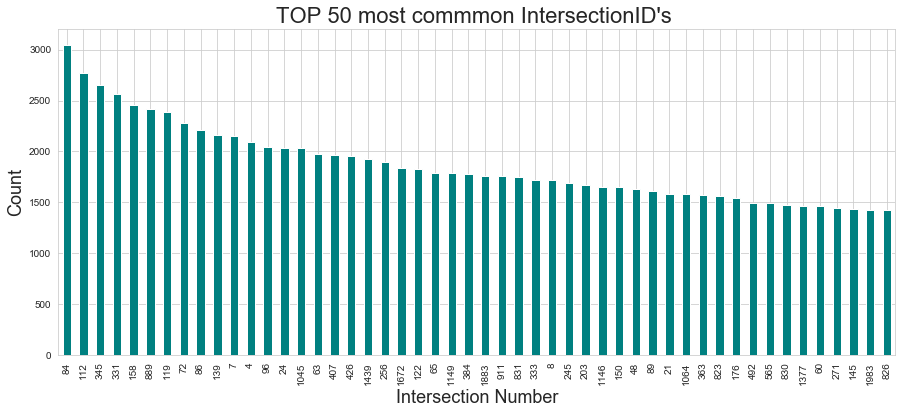

In [43]:
'''Visulization of IntersectionID'''
plt.figure(figsize=(15,6))
df_train.IntersectionId.value_counts()[:50].plot(kind='bar', color = 'teal')
plt.xlabel("Intersection Number", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("TOP 50 most commmon IntersectionID's ", fontsize=22)
plt.show()

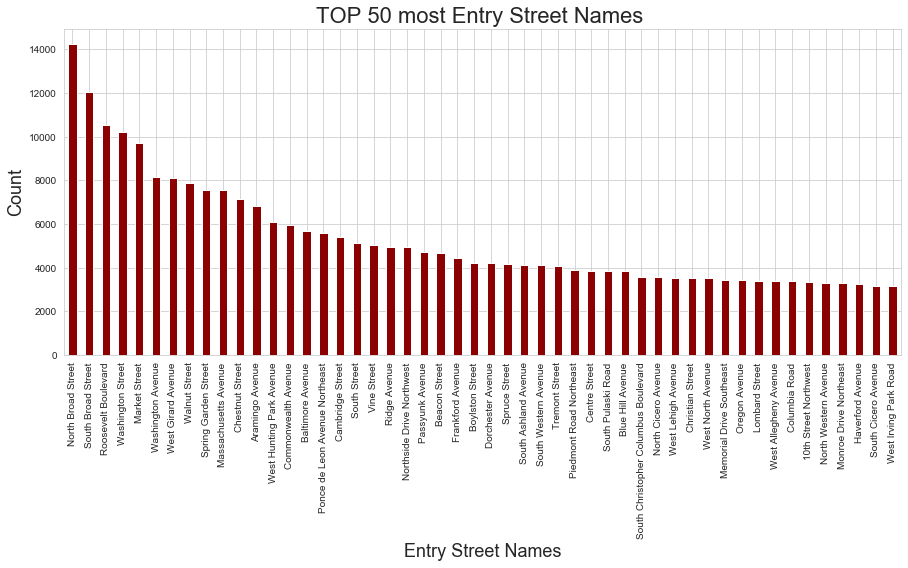

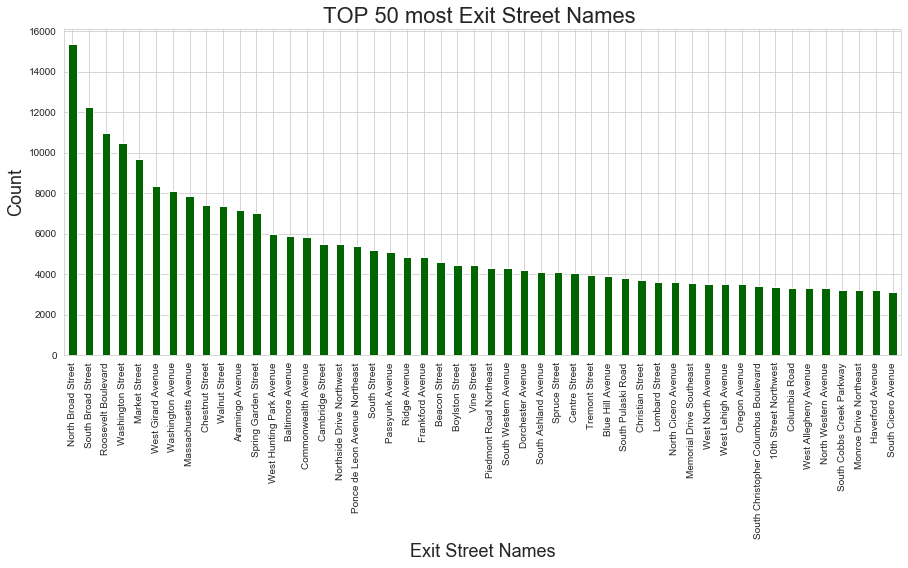

In [44]:
'''Visulization of Entry/Exit StreetNames'''
plt.figure(figsize=(15,6))
df_train['EntryStreetName'].value_counts()[:50].plot(kind='bar', color = 'darkred')
plt.xlabel("Entry Street Names", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("TOP 50 most Entry Street Names ", fontsize=22)
plt.show()

plt.figure(figsize=(15,6))
df_train['ExitStreetName'].value_counts()[:50].plot(kind='bar', color = 'darkgreen')
plt.xlabel("Exit Street Names", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("TOP 50 most Exit Street Names ", fontsize=22)
plt.show()

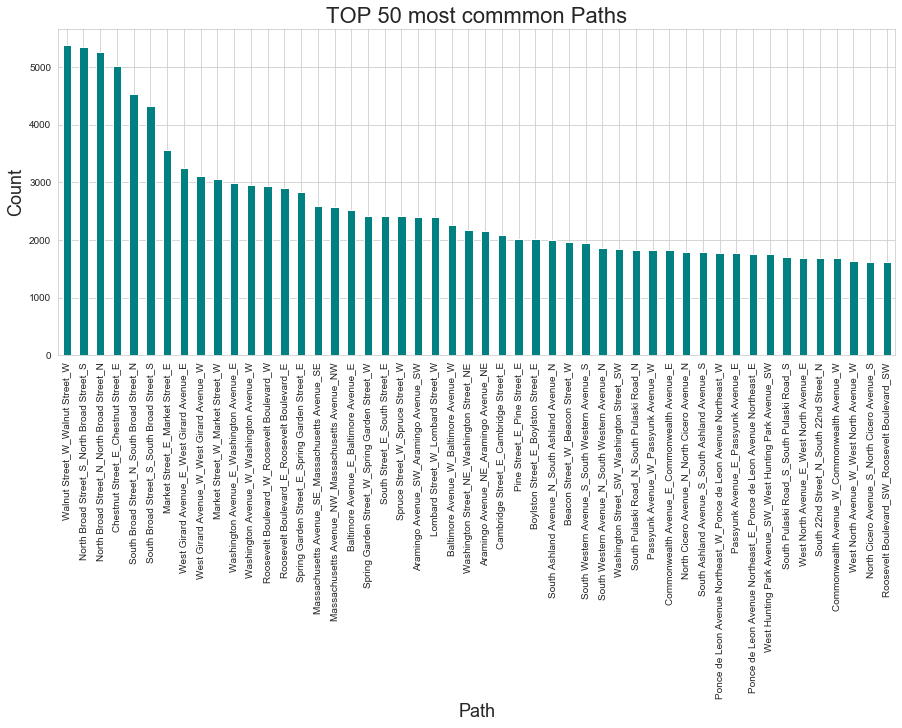

In [45]:
'''Visulization of Path'''
plt.figure(figsize=(15,6))
df_train.Path.value_counts()[:50].plot(kind='bar', color = 'teal')
plt.xlabel("Path", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("TOP 50 most commmon Paths", fontsize=22)
plt.show()

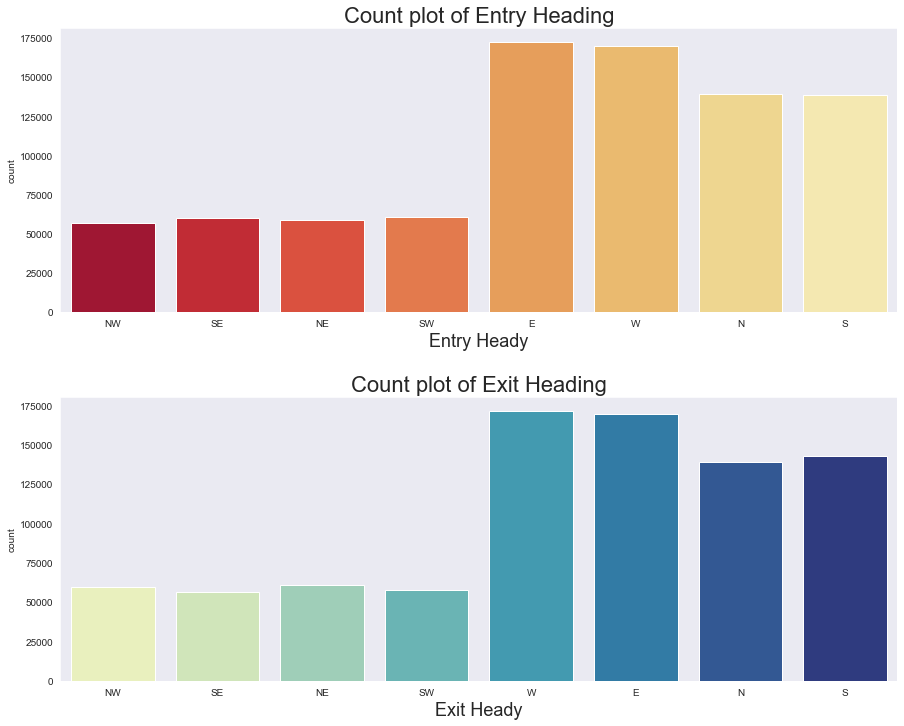

In [46]:
sns.set_style("dark")
fig, ax = plt.subplots(2,1, figsize=[15, 12])

sns.countplot(data = df_train, x = 'EntryHeading', ax = ax[0], palette = 'YlOrRd_r')
ax[0].set_title('Count plot of Entry Heading', fontsize = 22)
ax[0].set_xlabel('Entry Heady', fontsize = 18)

sns.countplot(data = df_train, x = 'ExitHeading', ax = ax[1], palette = 'YlGnBu')
ax[1].set_title('Count plot of Exit Heading', fontsize = 22)
ax[1].set_xlabel('Exit Heady', fontsize = 18)

plt.subplots_adjust(hspace = 0.3)
plt.show()

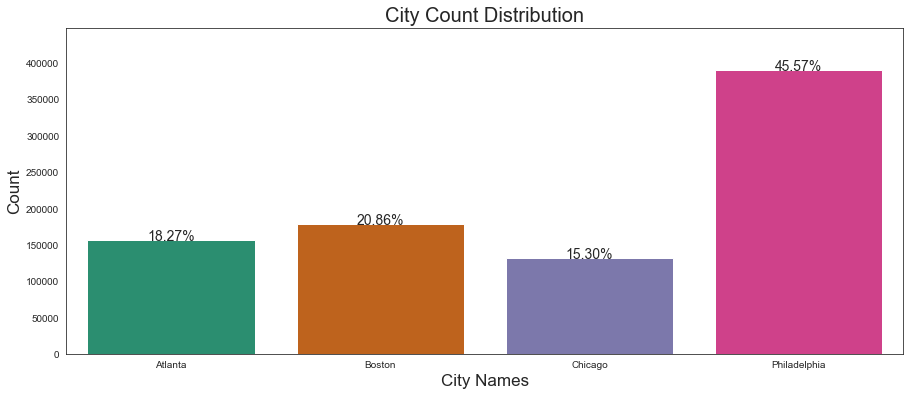

In [47]:
total = len(df_train)
plt.figure(figsize=(15,6))
sns.set_style("white")

ax = sns.countplot(x = "City", data = df_train, palette = 'Dark2')
ax.set_title("City Count Distribution", fontsize=20)
ax.set_ylabel("Count",fontsize= 17)
ax.set_xlabel("City Names", fontsize=17)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
ax.set_ylim(0, max(sizes) * 1.15)

plt.show()

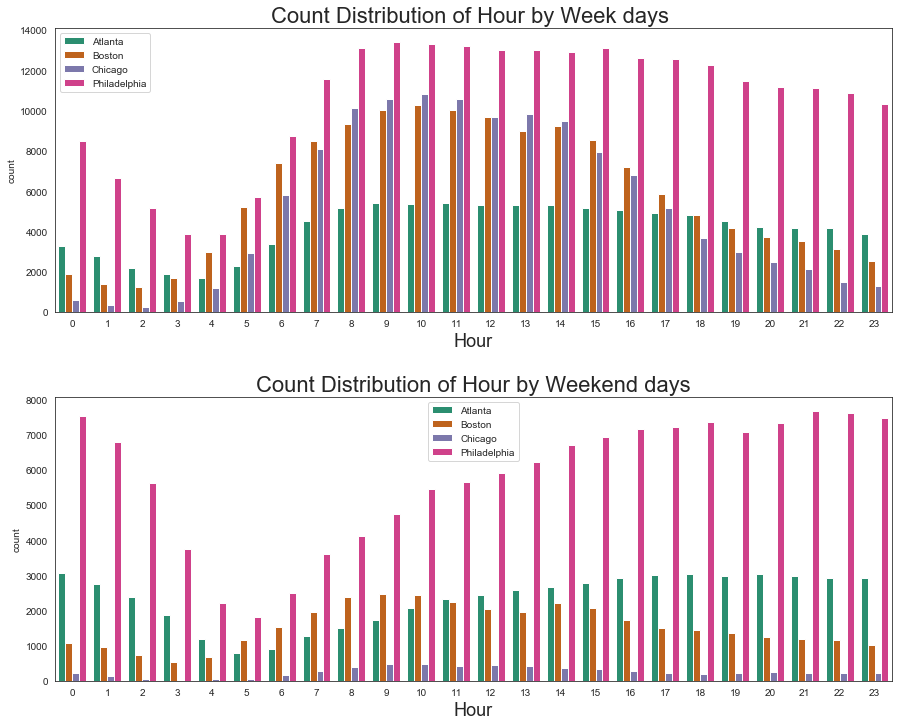

In [48]:
fig, ax = plt.subplots(2,1, figsize=[15, 12])

sns.countplot(data = df_train[df_train['Weekend']==0], x = 'Hour', hue = 'City', ax = ax[0], palette = 'Dark2')
ax[0].legend()
ax[0].set_title('Count Distribution of Hour by Week days ', fontsize = 22)
ax[0].set_xlabel('Hour', fontsize = 18)

sns.countplot(data = df_train[df_train['Weekend']==1], x = 'Hour', hue = 'City', ax = ax[1], palette = 'Dark2')
ax[1].legend()
ax[1].set_title('Count Distribution of Hour by Weekend days', fontsize = 22)
ax[1].set_xlabel('Hour', fontsize = 18)

plt.subplots_adjust(hspace = 0.3)
plt.show()

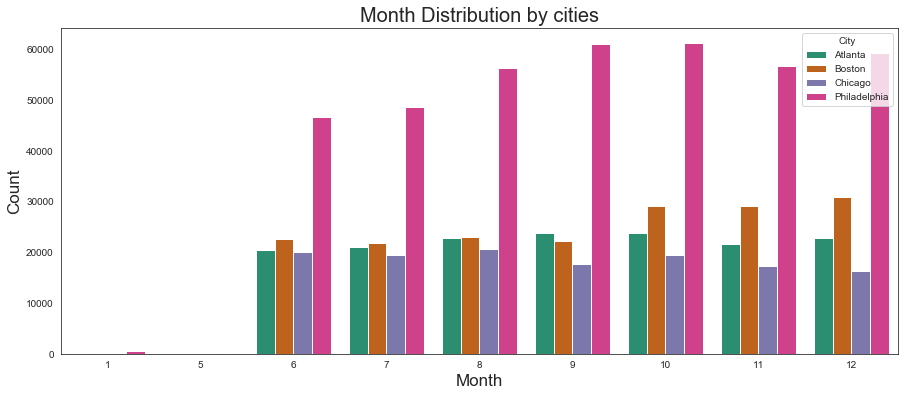

In [49]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x = "Month", data = df_train, hue = 'City',palette = 'Dark2')
ax.set_title("Month Distribution by cities", fontsize=20)
ax.set_ylabel("Count",fontsize= 17)
ax.set_xlabel("Month", fontsize=17)
plt.show()

In [51]:
'''Visualition of Map Plot of Atlanta city'''
import mplleaflet
plt.figure(figsize=(10,10))
map1 = df_train[df_train['City']=='Atlanta'].groupby(['Latitude', 'Longitude'])['RowId'].count().reset_index()
plt.scatter(map1['Longitude'], map1['Latitude'], alpha=0.5)

mplleaflet.display()

C:\Users\Asus\Anaconda3\envs\darkenv\lib\site-packages\IPython\core\display.py:701: UserWarning:

Consider using IPython.display.IFrame instead



In [52]:
'''Visualition of Map Plot of Boston city'''
plt.figure(figsize=(10,10))
map2 = df_train[df_train['City']=='Boston'].groupby(['Latitude', 'Longitude'])['RowId'].count().reset_index()
plt.scatter(map2['Longitude'], map2['Latitude'], alpha=0.5)

mplleaflet.display()

In [53]:
'''Visualition of Map Plot of Philadelphia city'''
plt.figure(figsize=(10,10))
map3 = df_train[df_train['City']=='Philadelphia'].groupby(['Latitude', 'Longitude'])['RowId'].count().reset_index()
plt.scatter(map3['Longitude'], map3['Latitude'], alpha=0.5)

mplleaflet.display()

In [54]:
'''Visualition of Map Plot of Chicago city'''
plt.figure(figsize=[10, 10])
map4 = df_train[df_train['City']=='Chicago'].groupby(['Latitude', 'Longitude'])['RowId'].count().reset_index()
sns.kdeplot(map4['Longitude'], map4['Latitude'])

mplleaflet.display()

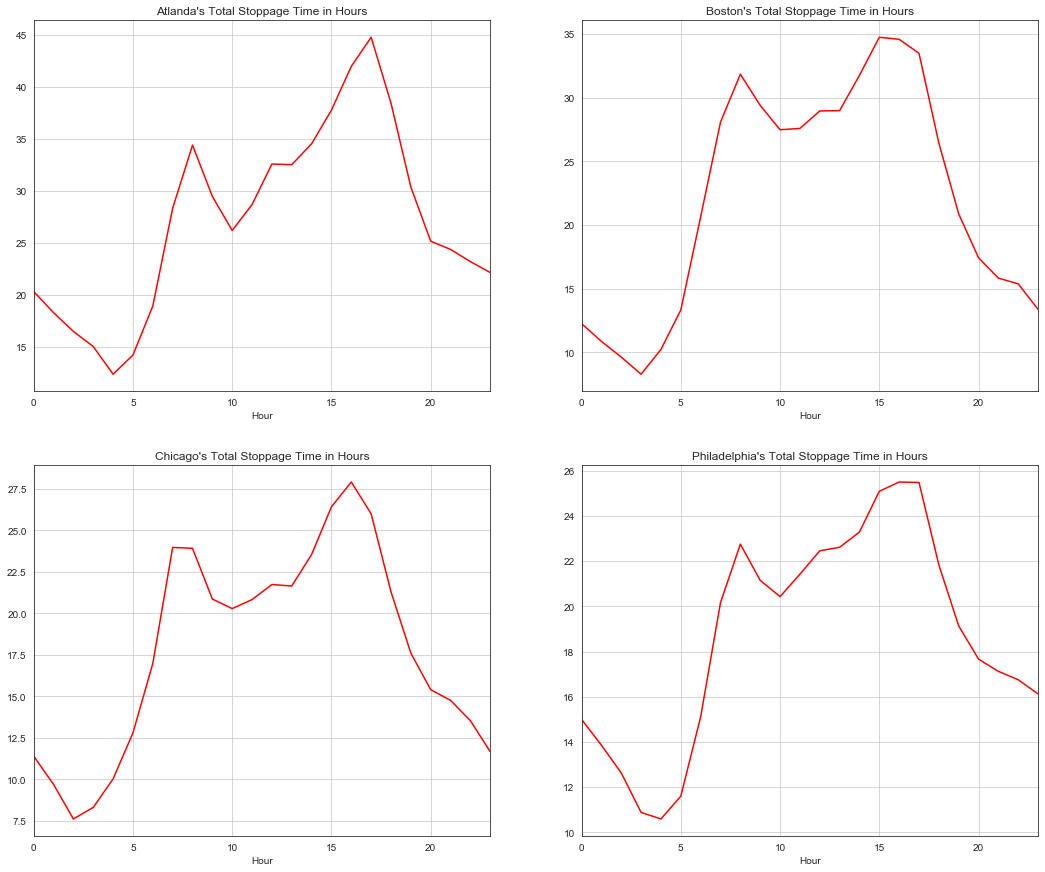

In [55]:
fig, ax = plt.subplots(nrows=2, ncols=2)
sns.set_style("whitegrid")

df_train[df_train['City']=='Atlanta'].groupby('Hour')['TotalTimeStopped_p80'].mean().plot(
    ax=ax[0,0],title="Atlanda's Total Stoppage Time in Hours", color='r', figsize=(18,15))

df_train[df_train['City']=='Boston'].groupby('Hour')['TotalTimeStopped_p80'].mean().plot(
    ax=ax[0,1],title="Boston's Total Stoppage Time in Hours", color='r', figsize=(18,15))


df_train[df_train['City']=='Chicago'].groupby('Hour')['TotalTimeStopped_p80'].mean().plot(
    ax=ax[1,0],title="Chicago's Total Stoppage Time in Hours", color='r', figsize=(18,15))


df_train[df_train['City']=='Philadelphia'].groupby('Hour')['TotalTimeStopped_p80'].mean().plot(
    ax=ax[1,1],title="Philadelphia's Total Stoppage Time in Hours", color='r', figsize=(18,15))

plt.show()

In [56]:
df_train['Intersection'] = df_train['IntersectionId'].astype(str) + df_train['City']
df_test['Intersection'] = df_test['IntersectionId'].astype(str) + df_test['City']
print(df_train['Intersection'].sample(6).values)

['2548Chicago' '1346Philadelphia' '278Atlanta' '1846Philadelphia'
 '476Atlanta' '272Boston']


In [57]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
le.fit(pd.concat([df_train['Intersection'], df_test['Intersection']]).drop_duplicates().values)
df_train['Intersection'] = le.transform(df_train['Intersection'])
df_test['Intersection'] = le.transform(df_test['Intersection'])
print(df_train['Intersection'].sample(6).values)

[6155 3745 3775 5017 5187  239]


In [58]:
'''Let's use the following road types: Street, Avenue, Road, Boulevard, Broad and Drive'''
road_encoding = {
    'Road': 1,
    'Street': 2,
    'Avenue': 2,
    'Drive': 3,
    'Broad': 3,
    'Boulevard': 4
}

In [59]:
def encode(x):
    if pd.isna(x):
        return 0
    for road in road_encoding.keys():
        if road in x:
            return road_encoding[road]
        
    return 0

In [60]:
df_train['EntryTypeStreet'] = df_train['EntryStreetName'].apply(encode)
df_train['ExitTypeStreet'] = df_train['ExitStreetName'].apply(encode)
df_test['EntryTypeStreet'] = df_test['EntryStreetName'].apply(encode)
df_test['ExitTypeStreent'] = df_test['ExitStreetName'].apply(encode)
print(df_train['EntryTypeStreet'].sample(10).values)

[1 2 2 2 0 1 2 2 2 2]


In [61]:
df_train["same_street_exact"] = (df_train["EntryStreetName"] ==  df_train["ExitStreetName"]).astype(int)
df_test["same_street_exact"] = (df_test["EntryStreetName"] ==  df_test["ExitStreetName"]).astype(int)

In [1]:
'''Defineing the directions'''
directions = {
    'N': 0,
    'NE': 1/4,
    'E': 1/2,
    'SE': 3/4,
    'S': 1,
    'SW': 5/4,
    'W': 3/2,
    'NW': 7/4
}

In [ ]:
from sklearn.metrics import roc_auc_score

a = []
b = []
res = []



for i in range(50):
    
    q=df[y==0].sample(n=1622 ,random_state=random.seed(100))
    x = pd.concat([df[y==1],q], axis=0)
    y=pd.Series(x['Type.of.pregnancy...Clinical.pregnancy'])
    x.drop(labels=['Type.of.pregnancy...Clinical.pregnancy'], axis=1 , inplace=True)
    train_df = x
    y_train = y
    features = train_df.columns
    

    importances = pd.DataFrame()
    folds = KFold(n_splits=5, shuffle=True, random_state=1)
    clfs = []
    averged = []
    oof_preds = np.zeros([train_df.shape[0], 2])
    oof_c_preds = np.zeros(train_df.shape[0])
    error = []
    lgb_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.01,
    'subsample': 0.8,
    'colsample_bytree': 0.15,
    'reg_alpha': .01,
    'seed': i,
    'reg_lambda': 1,
    'min_split_gain': 0.01,
    'min_child_weight': 5,
    'n_estimators': 2000,
    'bagging_fraction': 0.65,
    'bagging_freq': 5,
    'silent': -1,
    'is_unbalalnced': False,
    'verbose': -1,
    'max_depth': 4}
    
    
    
    for fold_, (trn_, val_) in enumerate(folds.split(train_df, y_train)):
        trn_x, trn_y = train_df[features].iloc[trn_], y_train.iloc[trn_]
        val_x, val_y = train_df[features].iloc[val_], y_train.iloc[val_]

        temp = []

        clf = lgb.LGBMClassifier(**lgb_params)
        clf.fit(
            trn_x, trn_y,
            eval_set=[(val_x, val_y)],
            verbose=100,
            sample_weight=trn_y.map(ws),
            early_stopping_rounds=200
        )
        oof_preds[val_, :] = clf.predict_proba(val_x, num_iteration=clf.best_iteration_)
        oof_c_preds[val_] = clf.predict(val_x, num_iteration=clf.best_iteration_)
        print(fbeta_score(beta=1, pos_label=1, y_pred=clf.predict(val_x, num_iteration=clf.best_iteration_),
                          y_true=val_y))
        print(precision_score(pos_label=1, y_pred=clf.predict(val_x, num_iteration=clf.best_iteration_),
                          y_true=val_y))
        print(recall_score(pos_label=1, y_pred=clf.predict(val_x, num_iteration=clf.best_iteration_),
                          y_true=val_y))
        print(accuracy_score(y_pred=clf.predict(val_x, num_iteration=clf.best_iteration_),
                          y_true=val_y))
        print('Fold AUC :', roc_auc_score(val_y, clf.predict_proba(val_x, num_iteration=clf.best_iteration_)[:, 1]))
        
        del clf

#         res.append([fbeta_score(beta=1, pos_label=1, y_pred=clf.predict(val_x, num_iteration=clf.best_iteration_),
#                           y_true=val_y), precision_score(pos_label=1, y_pred=clf.predict(val_x, num_iteration=clf.best_iteration_),
#                           y_true=val_y), recall_score(pos_label=1, y_pred=clf.predict(val_x, num_iteration=clf.best_iteration_),
#                           y_true=val_y),
#                           accuracy_score(y_pred=clf.predict(val_x, num_iteration=clf.best_iteration_),
#                           y_true=val_y), roc_auc_score(val_y, clf.predict_proba(val_x, num_iteration=clf.best_iteration_)[:, 1])])
       
#         clfs.append(clf)
#         imp_df = pd.DataFrame()
#         imp_df['feature'] = features
#         imp_df['gain'] = clf.feature_importances_
#         imp_df['fold'] = fold_ + 1
#         importances = pd.concat([importances, imp_df], axis=0, sort=False)
    print('OOF AUC :', roc_auc_score(y_train, oof_preds[:, 1]))
    res.append([fbeta_score(beta=1, pos_label=1, y_pred=oof_c_preds,
                          y_true=y_train), precision_score(pos_label=1, y_pred=oof_c_preds,
                          y_true=y_train), recall_score(pos_label=1, y_pred=oof_c_preds,
                          y_true=y_train),
                          accuracy_score(y_pred=oof_c_preds,
                          y_true=y_train), roc_auc_score(y_train, oof_preds[:, 1])])
    #print(oof_preds[:, 1])
    #print(res)


In [ ]:
res_knn_df = pd.DataFrame(res)
res_knn_df.columns = ['f_1', 'precision', 'recall', 'accuracy', 'AUC']
res_knn_df.describe()